In [74]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

%config InlineBackend.figure_format = 'retina'


df = pd.read_csv("hw6Smarket.csv", header=None)
X = df.iloc[:, 1:8]
y = df.iloc[:, 8]

neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X, y)
x_test = [-0.285, -0.841, -0.489, 0.655, 0.694, 2.584, -0.684]

print(neigh.predict([x_test]))
# > 'Down'


neigh.score(X,y)

['Down']


0.9456

In [44]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression().fit(X,y)

print(classifier.predict([x_test]))
# > 'Down'

classifier.score(X,y)

['Down']


0.9944

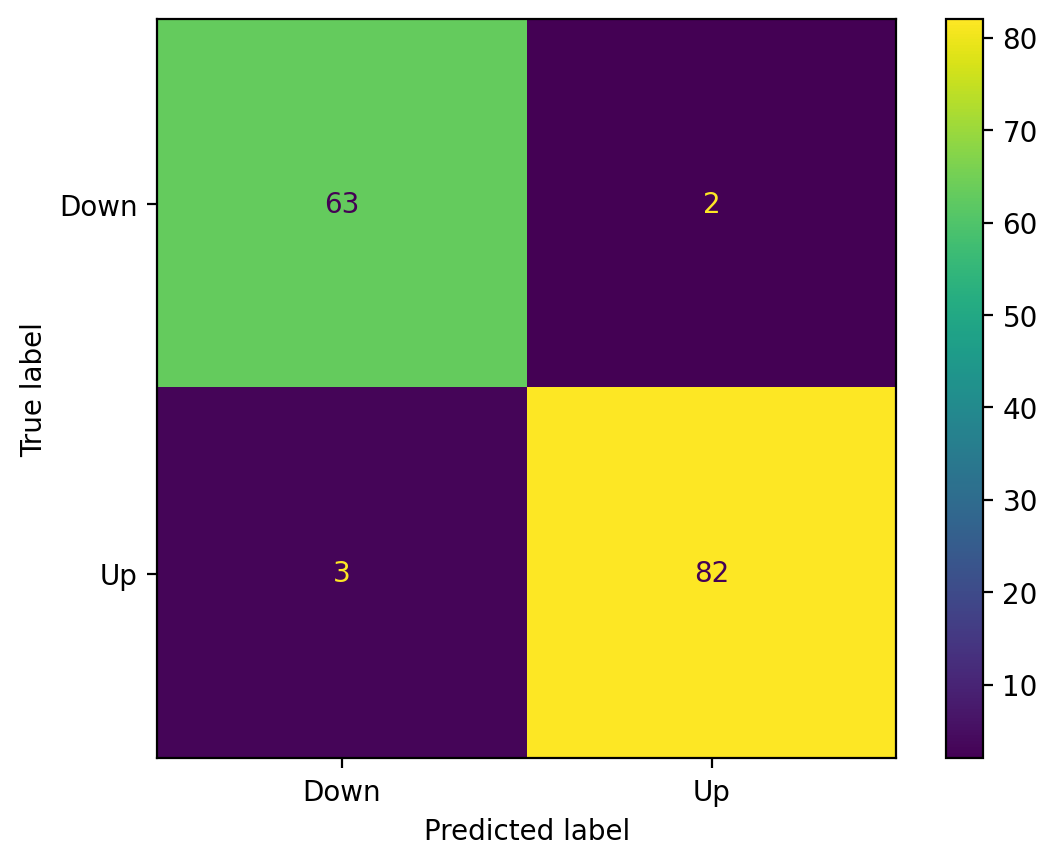

In [75]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

df_train = df.iloc[:1100]
df_test = df.iloc[1100:]

X_train = df_train.iloc[:, 1:8]
y_train = df_train.iloc[:, 8]

X_test = df_test.iloc[:, 1:8]
y_test = df_test.iloc[:, 8]

lda_classifier = LinearDiscriminantAnalysis().fit(X_train, y_train)

y_true = y_test
y_pred = lda_classifier.predict(X_test)

labels = ["Down", "Up"]
confusion = confusion_matrix(y_true, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion, display_labels=labels)
disp.plot();

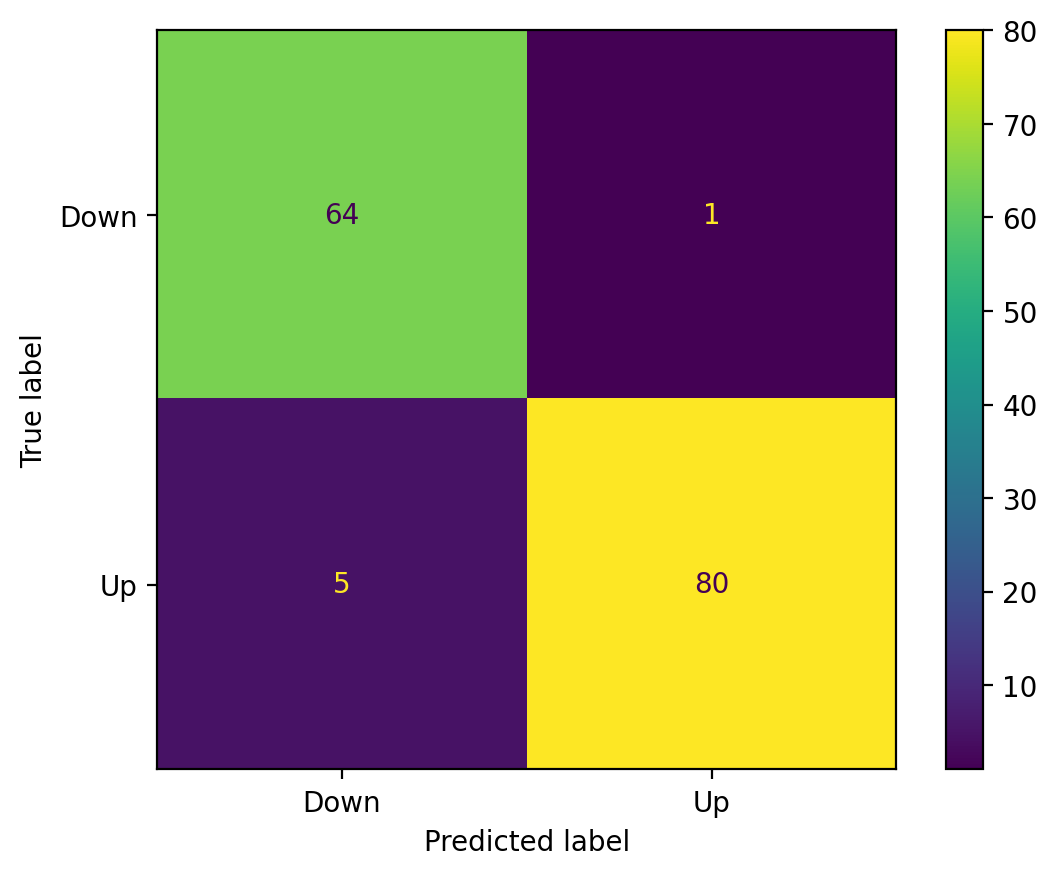

In [77]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

df_train = df.iloc[:1100]
df_test = df.iloc[1100:]

X_train = df_train.iloc[:, 1:8]
y_train = df_train.iloc[:, 8]

X_test = df_test.iloc[:, 1:8]
y_test = df_test.iloc[:, 8]

lda_classifier = QuadraticDiscriminantAnalysis().fit(X_train, y_train)

y_true = y_test
y_pred = lda_classifier.predict(X_test)

labels = ["Down", "Up"]
confusion = confusion_matrix(y_true, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion, display_labels=labels)
disp.plot();

,points,class
0,"[-2.0434652570815035, 3.0022901637216832]",1
1,"[-1.741159898236536, -0.8130380259965149]",1
2,"[-1.4246020300183555, -2.243374215300737]",1
3,"[0.7996992375475223, -0.31644167826582414]",1
4,"[5.207932476758405, 0.46700834948305403]",1
...,...,...
95,"[-3.613415691678972, -3.546967715246232]",2
96,"[-1.315573984814156, 0.09011288130579098]",2
97,"[-4.062867965505223, 1.3669196944033324]",2
98,"[0.6616602566255154, -2.7509303267111336]",2


[[1, 1]]


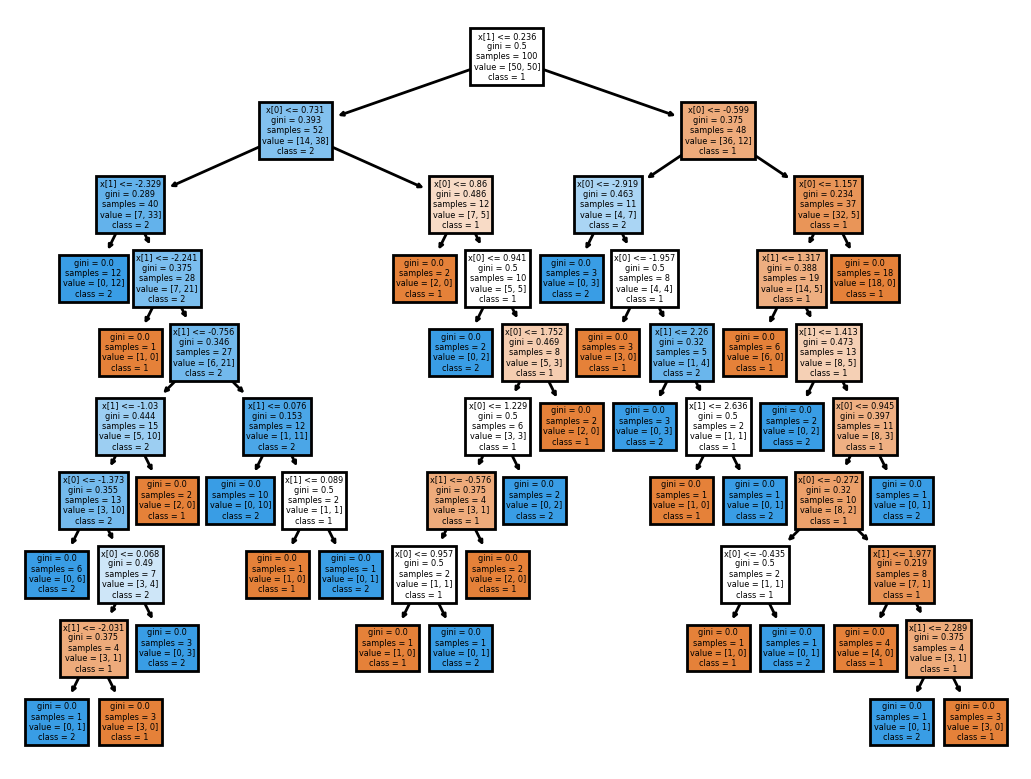

In [191]:
import numpy as np
from sklearn import tree

cov = [[3, 0], [0, 3]]
d1 = ((a, 1) for a in np.random.multivariate_normal([1, 1], cov, 50))
d2 = ((a, 2) for a in np.random.multivariate_normal([-1, -1], cov, 50))

df = pd.DataFrame([*d1, *d2], columns=["points", "class"])
display(df)


X = [x for x in df["points"]] # not sure why this is necessary, but it doesn't work without this step
y = df["class"]

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)
tree.plot_tree(clf, filled=True, class_names=["1", "2"])

print([[1, 1]])

[Text(0.4722222222222222, 0.9166666666666666, 'x[1] <= 0.236\ngini = 0.5\nsamples = 100\nvalue = [50, 50]\nclass = 1'),
 Text(0.2222222222222222, 0.75, 'x[0] <= 0.731\ngini = 0.393\nsamples = 52\nvalue = [14, 38]\nclass = 2'),
 Text(0.1111111111111111, 0.5833333333333334, 'x[1] <= -2.329\ngini = 0.289\nsamples = 40\nvalue = [7, 33]\nclass = 2'),
 Text(0.05555555555555555, 0.4166666666666667, 'gini = 0.0\nsamples = 12\nvalue = [0, 12]\nclass = 2'),
 Text(0.16666666666666666, 0.4166666666666667, 'x[1] <= -2.241\ngini = 0.375\nsamples = 28\nvalue = [7, 21]\nclass = 2'),
 Text(0.1111111111111111, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = 1'),
 Text(0.2222222222222222, 0.25, 'x[1] <= -0.756\ngini = 0.346\nsamples = 27\nvalue = [6, 21]\nclass = 2'),
 Text(0.16666666666666666, 0.08333333333333333, 'gini = 0.444\nsamples = 15\nvalue = [5, 10]\nclass = 2'),
 Text(0.2777777777777778, 0.08333333333333333, 'gini = 0.153\nsamples = 12\nvalue = [1, 11]\nclass = 2'),
 Text(0.33333333333

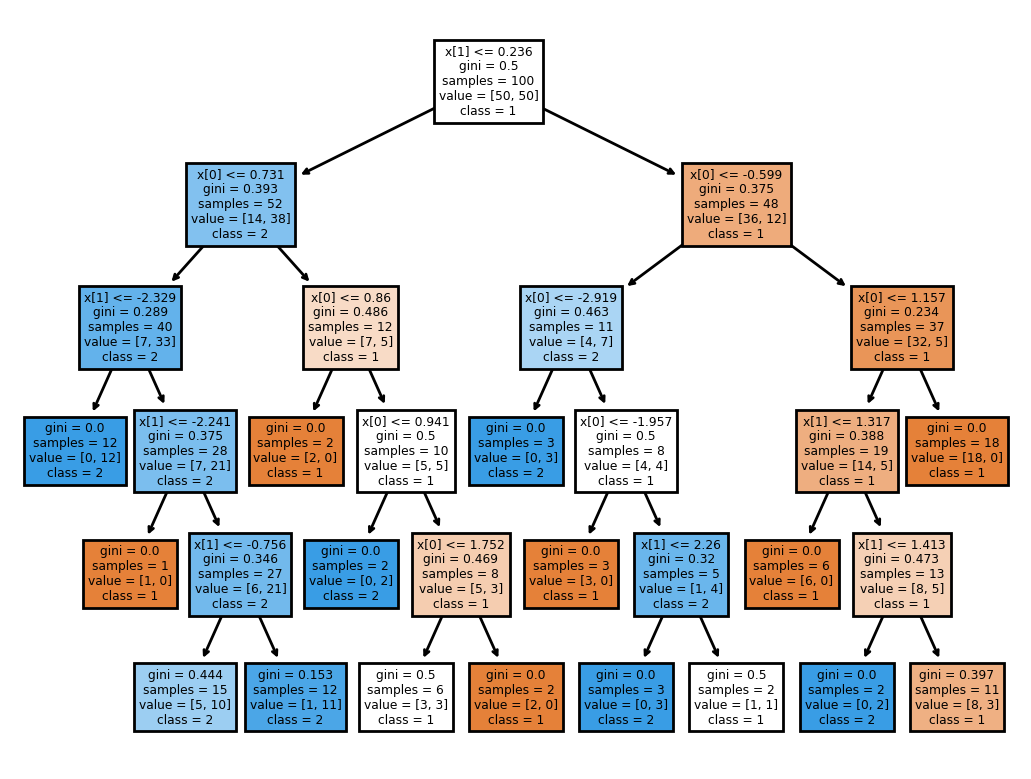

In [194]:
clf = tree.DecisionTreeClassifier(max_depth=5)
clf = clf.fit(X, y)
tree.plot_tree(clf, filled=True, class_names=["1", "2"])